# | IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
df=pd.read_excel('sydney_rain prediction.xlsx')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.shape

(3337, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


# Data Preprocessing

In [7]:
#deleting not imprtant data(Location and Date)
#deleting column with insufficient data(Cloud9am,Cloud3pm)
df = df.drop(["Cloud9am","Cloud3pm","Location","Date"],axis=1)

In [8]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Temp9am       3333 non-null   float64
 10  Temp3pm       3333 non-null   float64
 11  RainToday     3331 non-null   object 
 12  RainTomorrow  3337 non-null   object 
dtypes: float64(11), object(2)
memory usage: 339.0+ KB


In [10]:
df=df.dropna(axis = 0)

In [11]:
df.shape

(3220, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3336
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3220 non-null   float64
 1   MaxTemp       3220 non-null   float64
 2   Rainfall      3220 non-null   float64
 3   Evaporation   3220 non-null   float64
 4   Sunshine      3220 non-null   float64
 5   Humidity9am   3220 non-null   float64
 6   Humidity3pm   3220 non-null   float64
 7   Pressure9am   3220 non-null   float64
 8   Pressure3pm   3220 non-null   float64
 9   Temp9am       3220 non-null   float64
 10  Temp3pm       3220 non-null   float64
 11  RainToday     3220 non-null   object 
 12  RainTomorrow  3220 non-null   object 
dtypes: float64(11), object(2)
memory usage: 352.2+ KB


In [13]:
#labeling string data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [14]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1,1
5,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,23.8,26.0,1,1


# Dependant and Independant Variable Creation

In [15]:
y=df['RainTomorrow']
x=df.drop(['RainTomorrow'],axis=1)

In [16]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1
5,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,23.8,26.0,1


In [17]:
y.head()

0    1
1    1
2    1
3    1
5    1
Name: RainTomorrow, dtype: int32

# Visualisation

<Axes: xlabel='Sunshine', ylabel='Evaporation'>

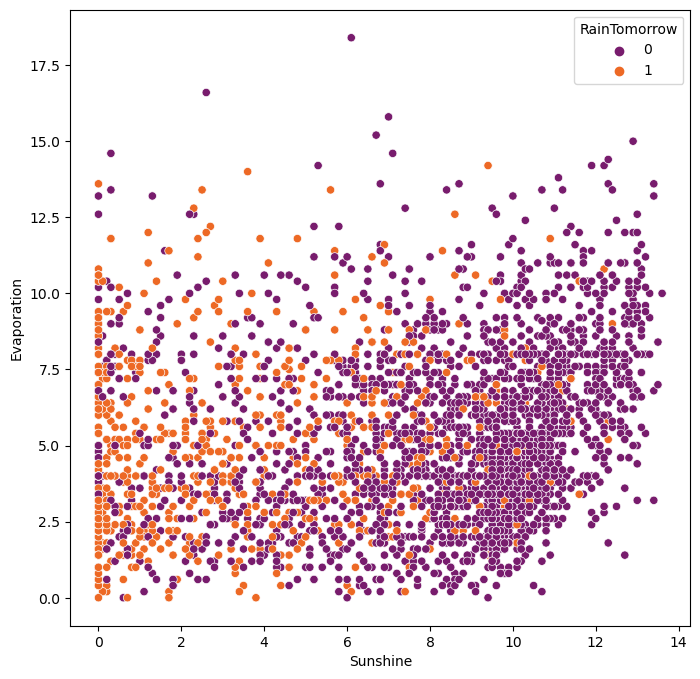

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Sunshine', y= 'Evaporation', hue ='RainTomorrow', palette ='inferno', data =df)

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

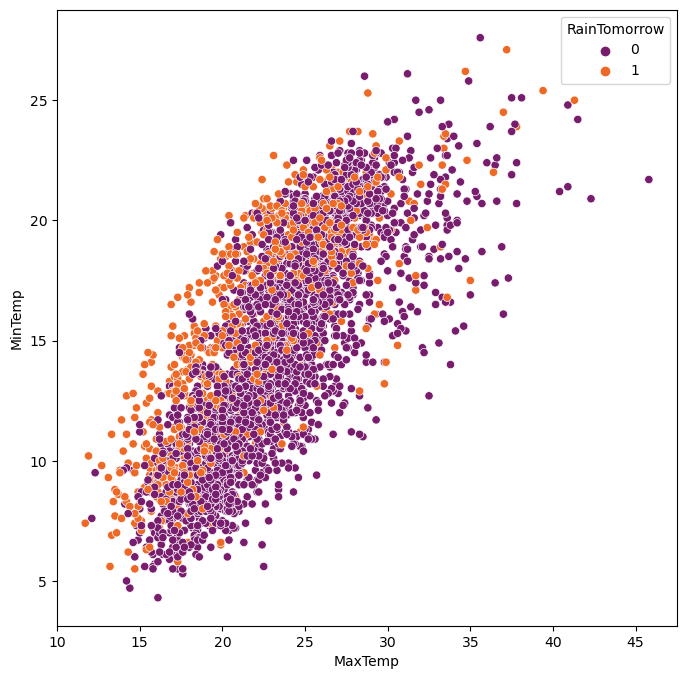

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'MaxTemp', y= 'MinTemp', hue ='RainTomorrow', palette ='inferno', data =df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

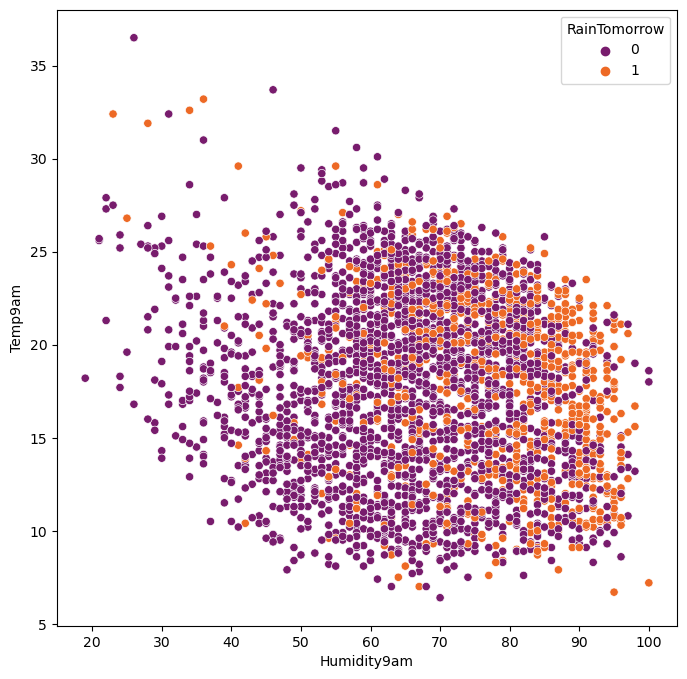

In [20]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Humidity9am', y= 'Temp9am', hue ='RainTomorrow', palette ='inferno', data =df)

# Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))
print (accuracy_score(y_test, pred1))

[[453  38]
 [ 74  79]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       491
           1       0.68      0.52      0.59       153

    accuracy                           0.83       644
   macro avg       0.77      0.72      0.74       644
weighted avg       0.82      0.83      0.82       644

0.8260869565217391


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred2=dt.predict(x_test)

In [26]:
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))
print (accuracy_score(y_test, pred2))

[[400  91]
 [ 64  89]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       491
           1       0.49      0.58      0.53       153

    accuracy                           0.76       644
   macro avg       0.68      0.70      0.69       644
weighted avg       0.77      0.76      0.77       644

0.7593167701863354


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))
print (accuracy_score(y_test, pred3))

[[461  30]
 [ 72  81]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       491
           1       0.73      0.53      0.61       153

    accuracy                           0.84       644
   macro avg       0.80      0.73      0.76       644
weighted avg       0.83      0.84      0.83       644

0.8416149068322981


# XGBoost Classifier

In [28]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [30]:
import xgboost as xgb
xgb= xgb.XGBClassifier()
xgb.fit(x_train,y_train)
pred4=xgb.predict(x_test)

print(confusion_matrix(y_test, pred4))
print(classification_report(y_test, pred4))
print (accuracy_score(y_test, pred4))

[[445  46]
 [ 71  82]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       491
           1       0.64      0.54      0.58       153

    accuracy                           0.82       644
   macro avg       0.75      0.72      0.73       644
weighted avg       0.81      0.82      0.81       644

0.8183229813664596


So, Random Forest Classifier giving 84% accuracy which is more than other classifier model.

## 1. Your views about the problem statement?

The current task is to predict rainfall using various Classification
model.The submitted information contains a variety of characteristics, including temperature, humidity, precipitation, and pressure. In order to prepare the data, we must numerically represent the categorical variables (RainToday and RainTomorrow). We also need to deal with outliers and missing values. After the data has
been cleansed and prepped, we may go on to utilising models to build a prediction model.We can experiment with several
regression, tree models and assess their accuracy-based performance.The chosen model must be highly accurate and capable of making
trustworthy Rain forecasts.

## 2. What will be your approach to solving this task?

Data Exploration: Analyze the provided weather data to understand its structure, features, and relationships. This
step involves identifying missing values, outliers, and the distribution of the target variable (RainTomorrow). Explore the
correlations between different features and the target variable to identify potential predictors.

Data Preprocessing: Clean the data by handling missing values, outliers, and categorical variables. Convert the
categorical variables, such as RainToday and RainTomorrow, into numerical representations. Normalize the numerical features if necessary.

Feature Selection: Use statistical techniques, such as correlation analysis and feature importance, to select the most
relevant features for predicting the salary. This step helps in reducing the dimensionality of the dataset and improving
model performance.

Splitting the Data: Divide the dataset into training and testing sets. The training set will be used to train the machine
learning model, while the testing set will be used to evaluate its performance.

Model Selection: Choose a regression model that is suitable for predicting continuous values like RainTomorrow. Some popular
algorithms include Logistick Regression, Decision Tree , Random Forest classification, and XGboost
Boosting Classification. Select a model based on its performance metrics, interpretability, and suitability for the given
problem.

Model Training: Train the selected Classification model using the training dataset. The model will learn the relationships
between the input features (such as tempareture, sunshine, cloud, etc.) and the target variable (RainTomorrow) based on the provided data.

## 3. What ML model options did you have available to perform this task?

For the given task, there are several machine learning model options available to consider. Here are some commonly
used models for regression tasks:
    

Decision Tree Classifier: A supervised learning algorithm that recursively splits data based on significant features to create a tree-like structure for prediction.

Logistic Regression: A classification algorithm that estimates the probability of a binary or multiclass outcome using a logistic function, making it suitable for binary classification problems and providing interpretable coefficients.

Random Forest Classifier: An ensemble method that combines multiple decision trees using bagging to improve prediction accuracy by averaging their results.

XGBoosting: An ensemble method that sequentially adds decision trees to correct errors of previous trees, creating a strong learner.'

Confusion Matrix: A performance evaluation tool that shows the count of true positives, true negatives, false positives, and false negatives, providing insights into model performance.

Accuracy Score: A metric that measures the proportion of correct predictions made by a model, indicating its overall accuracy.


## 4. Which model’s performance is best and what could be the possible reason for that?

Random Forest Regression is the best model because we can see that the model achieved an overall accuracy of 0.8416, which indicates that it correctly predicted the rainfall in 84.16% of the cases. To further evaluate its performance, we can analyze the precision, recall, and F1-score for each class, as well as the support values.

Precision measures the proportion of true positive predictions out of the total predicted positive instances. In this case, the model achieved a precision of 0.86 for class 0 (no rainfall) and 0.73 for class 1 (rainfall). This indicates that out of all instances predicted as no rainfall, 86% were actually true negatives, and out of all instances predicted as rainfall, 73% were true positives.

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of the actual positive instances. The model achieved a recall of 0.94 for class 0, indicating that it correctly identified 94% of the instances with no rainfall. For class 1, the recall is 0.53, meaning that the model captured only 53% of the instances with rainfall.

The F1-score combines precision and recall into a single metric that balances both measures. The F1-score for class 0 is 0.90, indicating a good balance between precision and recall. However, the F1-score for class 1 is lower at 0.61, suggesting that there is room for improvement in capturing instances with rainfall.

Looking at the support values, we see that class 0 (no rainfall) has a larger number of instances with a support of 491, while class 1 (rainfall) has a smaller support of 153. This class imbalance may have influenced the model's performance, as it could be more challenging to accurately predict the minority class.

The Random Forest Classifier demonstrated a good overall accuracy and reasonably high precision for both classes. However, the recall and F1-score for the rainfall class (class 1) are relatively lower, indicating potential areas for improvement.

## 5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the selected Random Forest Classifier model for rainfall prediction, the following steps can be taken:

1.Hyperparameter Tuning: Perform a systematic search for the optimal hyperparameter settings for the Random Forest Classifier. This can be done using techniques like grid search or random search to explore different combinations of hyperparameters, such as the number of trees, maximum depth, and minimum sample split. Finding the best hyperparameters can significantly improve the model's performance.

2.Feature Engineering: Conduct a thorough analysis of the available features and consider creating additional features that capture relevant information. For example, you can derive temporal features like day of the week, month, or season from the date variable. Additionally, consider interactions or transformations of existing features that may provide more predictive power.

3.Address Class Imbalance: Deal with the class imbalance issue by employing techniques to balance the distribution of the target variable. This can include oversampling methods like Synthetic Minority Over-sampling Technique (SMOTE) or undersampling techniques to reduce the dominance of the majority class. Balancing the classes can help the model better learn the patterns in the minority class and improve its ability to predict instances with rainfall accurately.

4.Cross-Validation: Implement a robust cross-validation strategy, such as k-fold cross-validation, to evaluate the model's performance on different subsets of the data. This helps to estimate the model's generalization ability and detect overfitting. By averaging the performance metrics across multiple folds, you can obtain a more reliable assessment of the model's accuracy and identify potential areas for improvement.

5.Ensemble Variations: Explore alternative ensemble methods or variations of the Random Forest algorithm. For example, consider using gradient boosting algorithms like XGBoost or LightGBM, which have demonstrated excellent performance in various classification tasks. These algorithms can offer improved predictive capabilities and handle complex relationships between features more effectively.